In [84]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

1. Comparing Classification Models (70%)
a. Please use the scikit-learn breast cancer dataset (e.g. with the Python sklearn.datasets.load_breast_cancer() command), and perform a
 randomized (20%/80%) test/train split of the data to allow for model
 cross-validation in later steps.


In [85]:

#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

#Perform split
bc = load_breast_cancer(as_frame = True)



X = bc.data     # features
y = bc.target   # target
print(X.shape)    ## shape


np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


(569, 30)


1b. Please perform an exploratory data analysis on your training set to gain intuition for your modelling efforts. Do you notice anything interesting? Which features
seem most important? Why?


When creating linear models for each of the features, R^2 values vary widely. There are those with relatively high values between 50 and 60%, intermediate values of around 30-40%, lower values of 10-20%, and those whose R^2 hovers around 0. “Mean” features have relatively high R^2 values, and most of them have a relatively normal distribution or a slightly left skew. “Worst” features also have high R^2 values, slightly higher than those of “Mean,” and appear to have similar distributions to the “Mean” variables. The “Error” variables have the lowest R^2 values, and are less normal and more left skewed. Given these facts, I anticipate that ‘Worst’ variables will be the most important as an overall group, followed by ‘Mean’ and ‘Error.’

Almost all regression lines have a negative slope, although exceptions include Mean Fractal Dimension, Texture Error, Smoothness Error, and Symmetry Error, which has positive slopes close to 0. This leads me to anticipate that they will be less important to the model, as they show little relationship to the outcome variable.

The only variable with a positive slope of notable magnitude is Smoothness Error, but it has a very low R^2, so I do not think it will play a large role in the models. 

There appear to be some Error variables whose overall values between the two classes of benign and malignant are similar, but whose distributions have several outliers that are driving much of the slope of the regression line. These include Texture Error, Compactness Error, Concavity Error, and Fractal Dimension Error. This may indicate that they will not end up being that significant to the models. 

In terms of importance, Mean Radius, Mean Perimeter, Mean Area, Mean Concavity, Mean Concave Points, Worst Radius, Worst Perimeter, Worst Area, Worst Concave Points all have high R^2 values of around 50% or above, so I predict that they will be the most important to the models.

See Notebook.





mean radius
MSE:
0.10918191465390865
R^2:
0.532941627421065
Coefficient
-0.10024659780908442
Intercept
2.0436294533917057


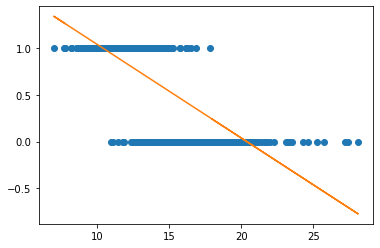

mean texture
MSE:
0.19346888719617128
R^2:
0.17237883320755243
Coefficient
-0.04671331108584478
Intercept
1.5284998716153357


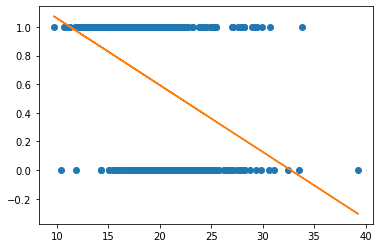

mean perimeter
MSE:
0.1048418558709502
R^2:
0.5515075300111687
Coefficient
-0.014789701153481952
Intercept
1.9876110394519313


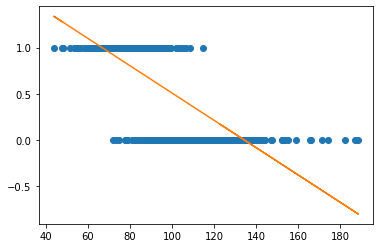

mean area
MSE:
0.1162611489106491
R^2:
0.502658080539339
Coefficient
-0.0009749253606870156
Intercept
1.2658845158365342


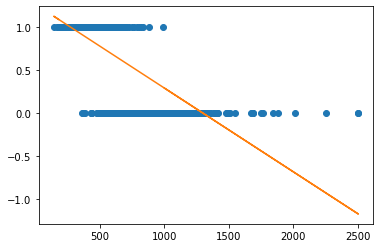

mean smoothness
MSE:
0.20371097114167996
R^2:
0.1285652485624248
Coefficient
-12.337316885472932
Intercept
1.8162438444878655


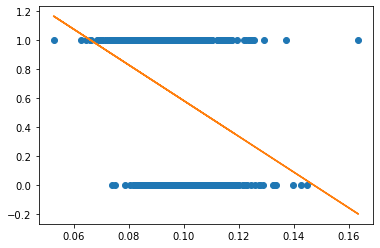

mean compactness
MSE:
0.15057917664221232
R^2:
0.35585242840152076
Coefficient
-5.465977719140279
Intercept
1.1977420149471225


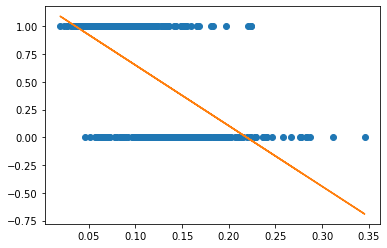

mean concavity
MSE:
0.12040843012990107
R^2:
0.48491684177254235
Coefficient
-4.2270669219853705
Intercept
1.0027771707968127


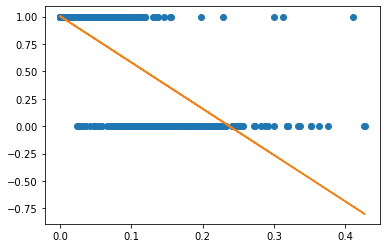

mean concave points
MSE:
0.09277454816052516
R^2:
0.6031290565112866
Coefficient
-9.68530487239394
Intercept
1.1012133620584466


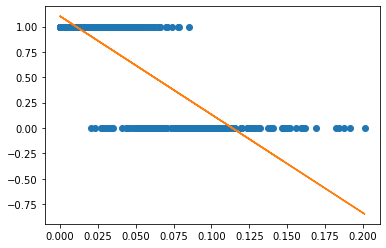

mean symmetry
MSE:
0.2082310410609327
R^2:
0.1092292943696338
Coefficient
-5.833973286131787
Intercept
1.6843099889368707


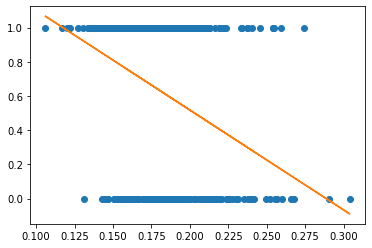

mean fractal dimension
MSE:
0.23372650495521807
R^2:
0.0001648040430426434
Coefficient
0.8798905443309996
Intercept
0.5721614971044847


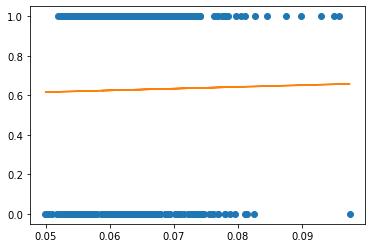

radius error
MSE:
0.15857666583863425
R^2:
0.32164077072324315
Coefficient
-0.9896633184685769
Intercept
1.0284004419391375


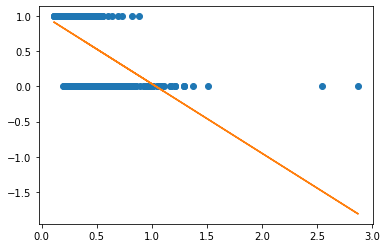

texture error
MSE:
0.23374891336820325
R^2:
6.894533847512374e-05
Coefficient
0.007283864102259891
Intercept
0.6185531252157854


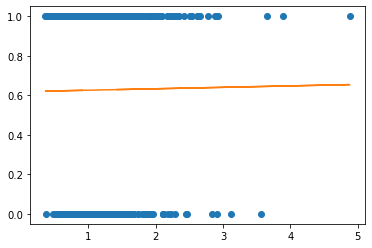

perimeter error
MSE:
0.16146326392403057
R^2:
0.30929248201326487
Coefficient
-0.1331087204760324
Intercept
1.0089139966872616


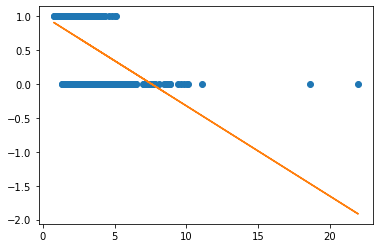

area error
MSE:
0.16350399425517873
R^2:
0.3005626462125295
Coefficient
-0.005831948817926906
Intercept
0.8626603009057947


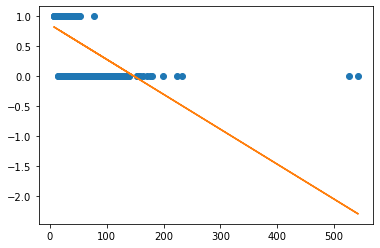

smoothness error
MSE:
0.23271515757243688
R^2:
0.004491145673990005
Coefficient
10.801018176248705
Intercept
0.5513667790214162


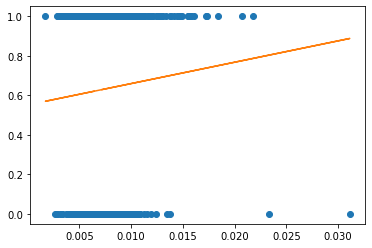

compactness error
MSE:
0.21369663981190645
R^2:
0.08584855713040207
Coefficient
-7.917476864958586
Intercept
0.8291390950393557


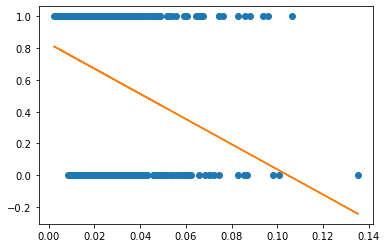

concavity error
MSE:
0.2187155196084566
R^2:
0.06437879414468695
Coefficient
-4.067585783580719
Intercept
0.757146947399194


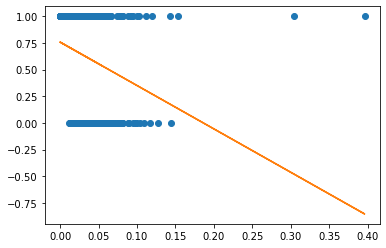

concave points error
MSE:
0.1948434928801431
R^2:
0.16649854528872665
Coefficient
-32.00160222815868
Intercept
1.0049118069571275


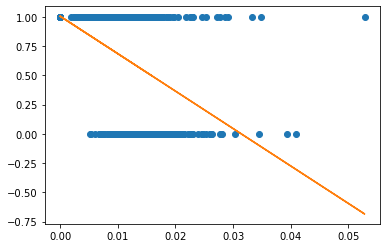

symmetry error
MSE:
0.23375508757926475
R^2:
4.253329963621599e-05
Coefficient
0.3817871918881787
Intercept
0.6195737336486573


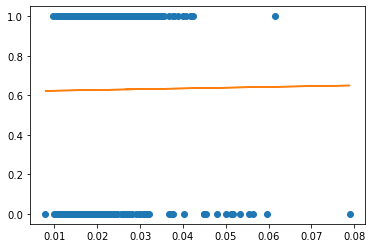

fractal dimension error
MSE:
0.2323438096192203
R^2:
0.006079697873680345
Coefficient
-14.259728234278965
Intercept
0.6815308180214359


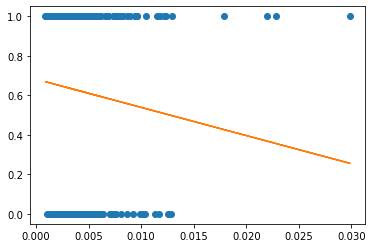

worst radius
MSE:
0.0928326589250402
R^2:
0.6028804702945149
Coefficient
-0.07774077076915825
Intercept
1.892195875571807


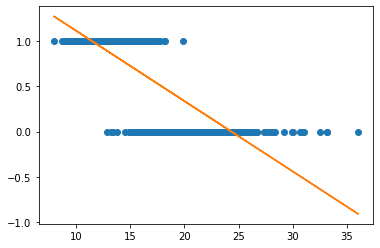

worst texture
MSE:
0.18496419864110986
R^2:
0.20876018820035458
Coefficient
-0.03597367587984068
Intercept
1.551120625051444


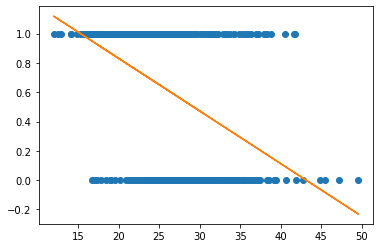

worst perimeter
MSE:
0.0904776922681191
R^2:
0.612954546186532
Coefficient
-0.01127492694650632
Intercept
1.8367788570759291


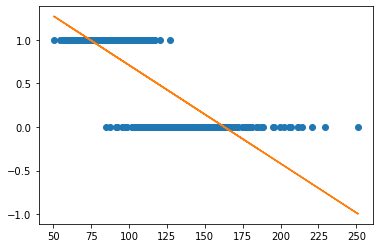

worst area
MSE:
0.10788275276772089
R^2:
0.5384991818768818
Coefficient
-0.0006237055412127578
Intercept
1.1766410968271117


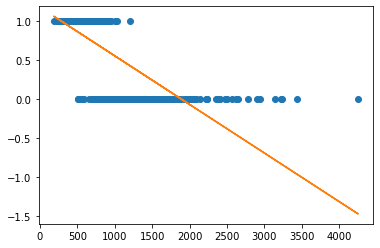

worst smoothness
MSE:
0.19224073343656914
R^2:
0.17763262911372202
Coefficient
-8.93266374097736
Intercept
1.809820660498634


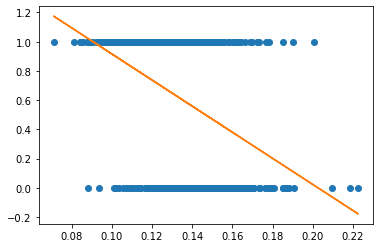

worst compactness
MSE:
0.1521158337037935
R^2:
0.34927891713210335
Coefficient
-1.8177262087694555
Intercept
1.0896007545486097


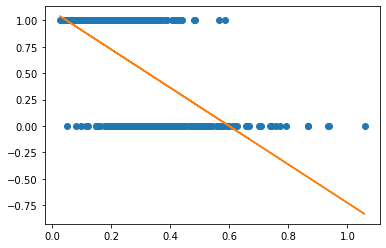

worst concavity
MSE:
0.13205722495169844
R^2:
0.43508562962334385
Coefficient
-1.5300099494368298
Intercept
1.0438676077882012


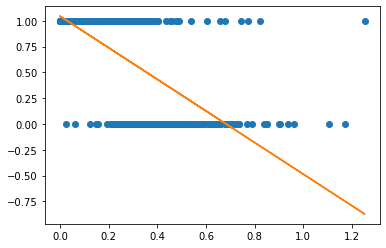

worst concave points
MSE:
0.08655219828445855
R^2:
0.6297470235614584
Coefficient
-5.842190287141521
Intercept
1.2969678842276955


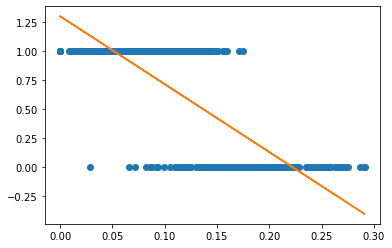

worst symmetry
MSE:
0.19325332773869688
R^2:
0.17330095341144447
Coefficient
-3.2561910206320444
Intercept
1.5719579903837975


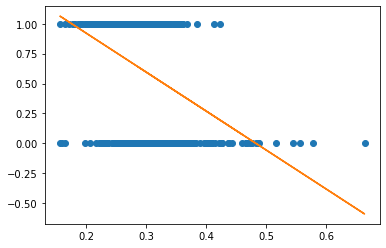

worst fractal dimension
MSE:
0.20924466954903148
R^2:
0.10489319462681701
Coefficient
-8.677550953322223
Intercept
1.3558606264834765


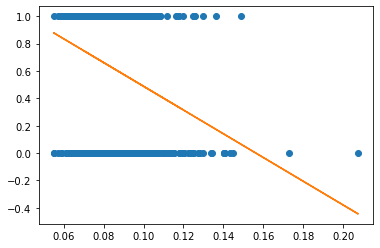

In [71]:
#Graph and check R^2 values

for col in bc.feature_names:

    x = X[col]
    x = np.array(x)
    x = x[:,None]
    lm = LinearRegression()
    lm.fit(X=x, y=y)
    if len(lm.coef_)==1:
        a1 = lm.coef_[0]
        a0 = lm.intercept_
        y_pred = a1*x + a0
        print(col)
        print("MSE:")
        print(mean_squared_error(y, y_pred))
        print("R^2:")
        print(r2_score(y, y_pred))
        print("Coefficient")
        print(a1)
        print("Intercept")
        print(a0)
        plt.plot(x, y, 'o')
        plt.plot(x, a1*x + a0)
        plt.show()


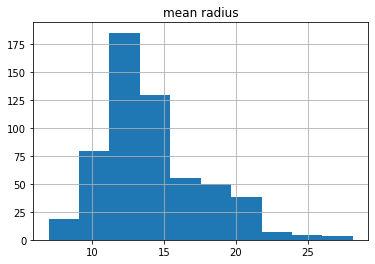

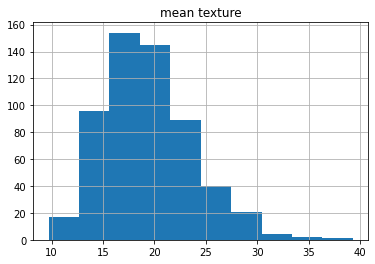

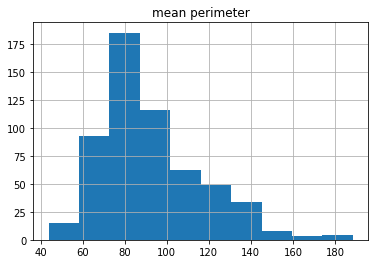

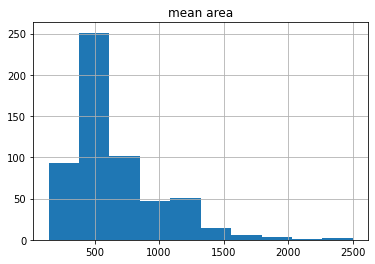

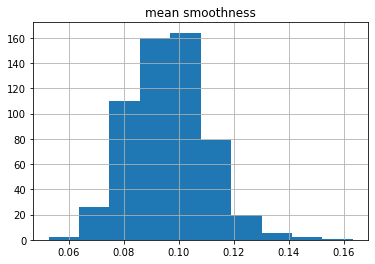

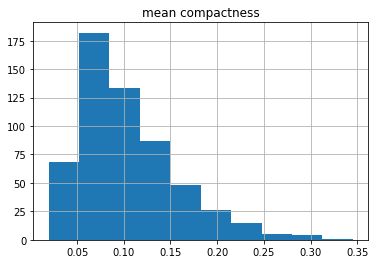

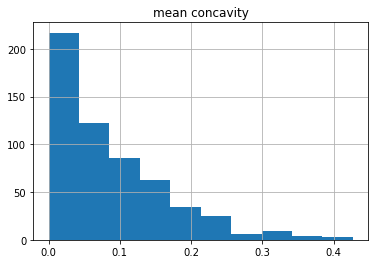

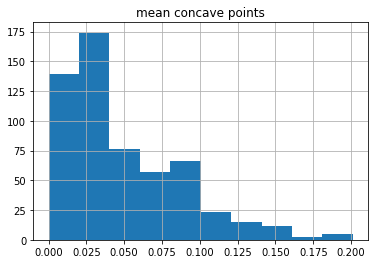

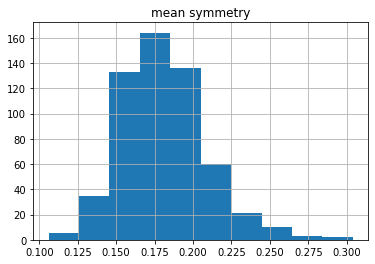

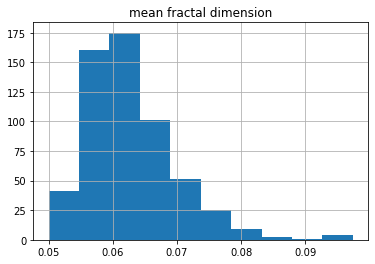

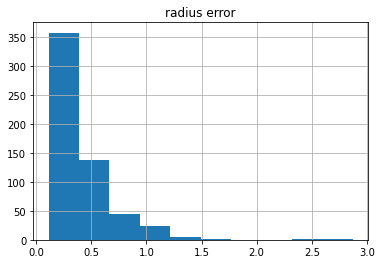

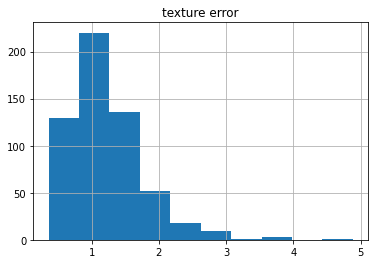

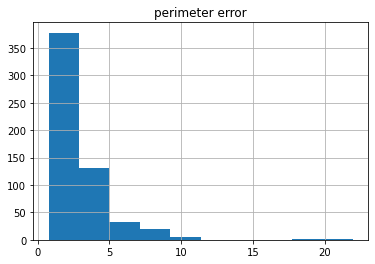

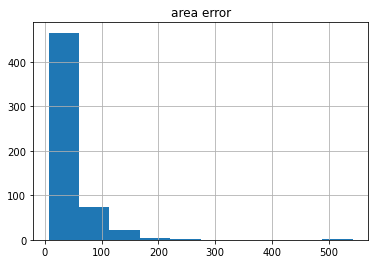

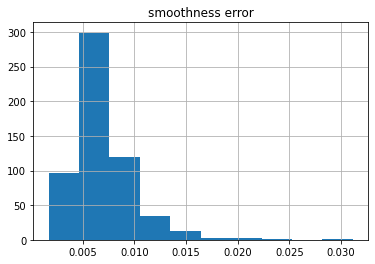

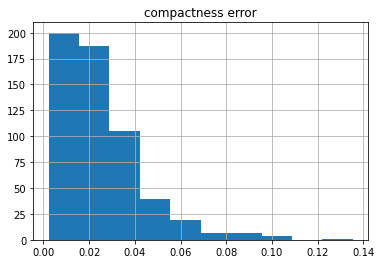

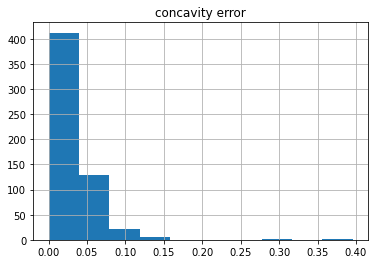

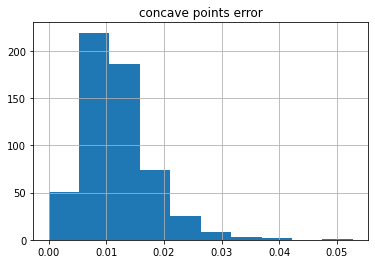

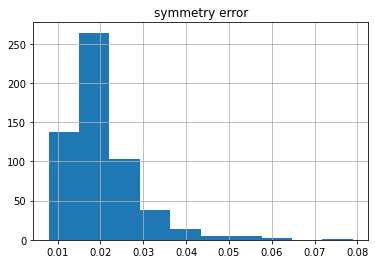

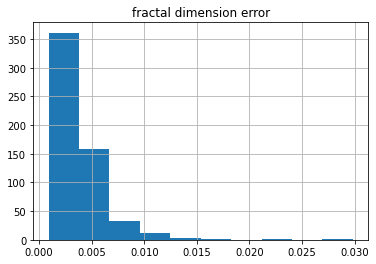

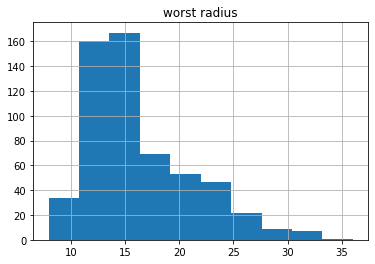

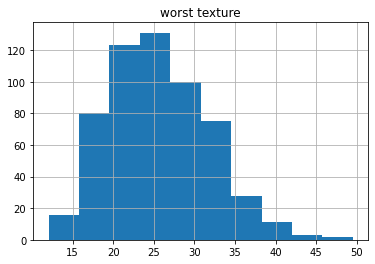

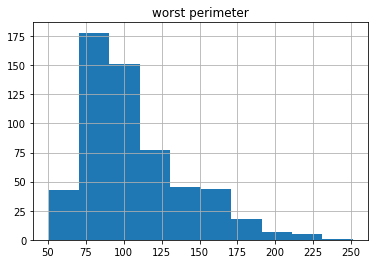

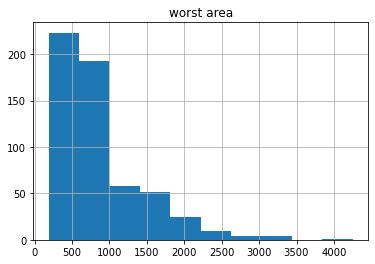

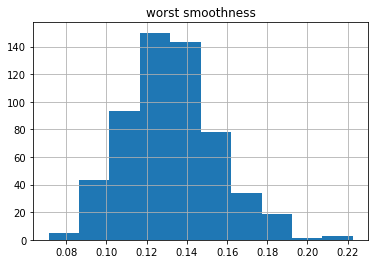

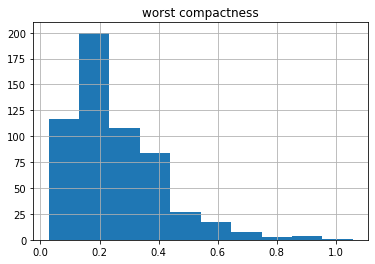

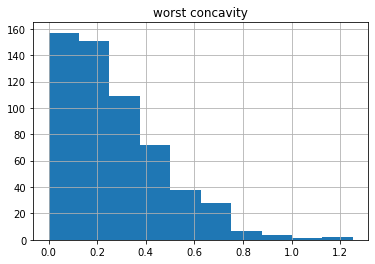

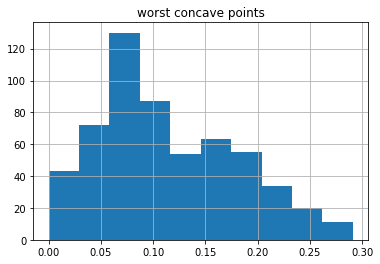

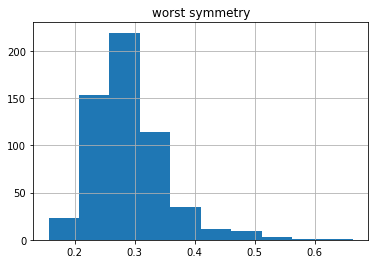

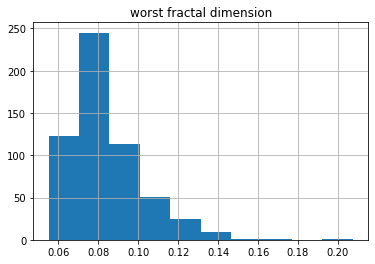

In [72]:
#Make histograms of features 
feats = X.columns

for f in feats:
    X[f].hist(bins=None) 
    plt.title(f)
    plt.show()
    


1c. Please create a binary classification model on your training set to predict which
data samples are benign or malignant, and make a confusion matrix to report
your results.

In [73]:
#Create Model and Confusion Matrix
np.random.seed(1)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_train)
print("RF" + ' Accuracy: {}'.format(np.sum(pred==y_train)/len(y_train)) )
confusion_matrix(y_train, pred)

RF Accuracy: 1.0


array([[170,   0],
       [  0, 285]])

1D. For this classification problem, what do you feel is the most appropriate way to
measure the “goodness” of the model? Please carefully explain your reasoning!

This model would have to balance the need for accurately predicting the status of the tumor, as either benign or malignant, and the need for avoiding overfitting to this particular set of test observations. Thus, I would be skeptical of a model that has extremely high accuracy on this data but that only uses one approach to make predictions. I chose random forest as my first model for this reason, as it makes multiple decision trees and lets them vote on a prediction, making it less susceptible to overfitting.

Importantly, as this is a model used for detecting whether breast cancer tumours are benign or malignant, a 'good' model would maximize the rate of true positives. This would be defined as the recall, or True Positives divided by True Positives plus False Positives.

Please repeat part 1c for each of the following types of classification models, choosing parameters that seem appropriate to give a good model. For each model you make, record the confusion matrix and how well the model performs for the “goodness” metric you decided on in part 1d:
Training Data Results:

i. Nearest Neighbors
Accuracy: 93.8%
Recall:95.5%
Confusion Matrix:
[[149  21]
 [  7 278]]


ii. Naive Bayes
Accuracy: 93%
Recall: 96.7%
Confusion Matrix: 
[[143  27]
 [  5 280]]


iii. Logistic Regression
Accuracy: 95.6%
Recall: 95.2%
Confusion Matrix:
[[158  12]
 [  8 277]]


iv. Support Vector Machines
Accuracy: 97.4%
Recall: 96.5%
Confusion Matrix:
[[164   6]
 [  6 279]]



v. Decision Trees
Accuracy: 99.8%
Recall: 100%
Confusion Matrix:
[[169   1]
 [  0 285]]




vi. Random Forests
Accuracy: 99.8%
Recall: 100%
Confusion Matrix:
[[169   1]
 [  0 285]]

I first tested the models using default conditions, then created new ones with altered parameters. These models all have very high accuracy and recall on the training data. Their high accuracy makes me a bit concerned about overfitting, despite implementing some parameters aimed at mitigating that risk. My parameter tweaks were also aimed at increasing recall.

My parameter changes included increasing the smoothing in Naive Bayes. I also increased the minimum number of samples required to split a node and limited tree depth for Decision Trees and Random Forest. I then increased the amount of neighbors to use for KNN calculations and limited the number of trees for Random Forest. Finally, I decreased the regularization parameter and increased the tolerance for stopping SVC, which was mainly aimed at increasing recall.

In [74]:
#Implement models on training data with default parameters


np.random.seed(5)

lgr = LogisticRegression(solver='liblinear')
nb = GaussianNB()
knn = KNeighborsClassifier()
linear_svm = SVC()
dt = DecisionTreeClassifier()
rf_c = RandomForestClassifier()

models = [ knn, nb, lgr, linear_svm, dt, rf_c]
names = [ 'k-Neighbors', 'Naive Bayes', 'Logistic Regresssion', 'Support Vector Machine', 'Decision Trees', 'Random Forest']


for model, name in zip(models, names):
    model.fit(X_train, y_train)
    pred = model.predict(X_train)
    print(name + ' Accuracy: {}'.format(np.sum(pred==y_train)/len(y_train)) )
    mat = confusion_matrix(y_train, pred)
    recall = mat[0,0] / (mat[0,0] + mat[1,0])
    print("Recall: " + str(recall))
    print(mat)
    

k-Neighbors Accuracy: 0.9472527472527472
Recall: 0.9506172839506173
[[154  16]
 [  8 277]]
Naive Bayes Accuracy: 0.9406593406593406
Recall: 0.949685534591195
[[151  19]
 [  8 277]]
Logistic Regresssion Accuracy: 0.9560439560439561
Recall: 0.9518072289156626
[[158  12]
 [  8 277]]
Support Vector Machine Accuracy: 0.9230769230769231
Recall: 0.9470198675496688
[[143  27]
 [  8 277]]
Decision Trees Accuracy: 1.0
Recall: 1.0
[[170   0]
 [  0 285]]
Random Forest Accuracy: 1.0
Recall: 1.0
[[170   0]
 [  0 285]]


In [86]:
#Implement models on training data with specified parameters to limit overfitting and increase recall

np.random.seed(5)

lgr = LogisticRegression(solver='liblinear')
nb = GaussianNB(var_smoothing = 0.000001)
knn = KNeighborsClassifier(n_neighbors = 20)
linear_svm = SVC(C = 0.75, kernel = 'linear', tol = .0001)
dt = DecisionTreeClassifier(min_samples_split = 5, max_depth = 20)
rf_c = RandomForestClassifier(n_estimators = 50, min_samples_split = 5, max_depth = 20)

models = [ knn, nb, lgr, linear_svm, dt, rf_c]
names = [ 'k-Neighbors', 'Naive Bayes', 'Logistic Regresssion', 'Support Vector Machine', 'Decision Trees', 'Random Forest']

for model, name in zip(models, names):
    model.fit(X_train, y_train)
    pred = model.predict(X_train)
    print(name + ' Accuracy: {}'.format(np.sum(pred==y_train)/len(y_train)) )
    mat = confusion_matrix(y_train, pred)
    recall = mat[0,0] / (mat[0,0] + mat[1,0])
    print("Recall: " + str(recall))
    print(mat)
    

k-Neighbors Accuracy: 0.9384615384615385
Recall: 0.9551282051282052
[[149  21]
 [  7 278]]
Naive Bayes Accuracy: 0.9296703296703297
Recall: 0.9662162162162162
[[143  27]
 [  5 280]]
Logistic Regresssion Accuracy: 0.9560439560439561
Recall: 0.9518072289156626
[[158  12]
 [  8 277]]
Support Vector Machine Accuracy: 0.9736263736263736
Recall: 0.9647058823529412
[[164   6]
 [  6 279]]
Decision Trees Accuracy: 0.9978021978021978
Recall: 1.0
[[169   1]
 [  0 285]]
Random Forest Accuracy: 0.9978021978021978
Recall: 1.0
[[169   1]
 [  0 285]]



1F. Which model performed the best on the training data, and how well did they
perform in general?


In terms of both accuracy and avoiding false negatives, the Random Forest and Decision Trees models performed best on the training data, achieving a score of 99.8% for accuracy and 100% for recall. In general, the models performed well, with the rest of the accuracy rates ranging from 93% for Naive Bayes to 97.4% for SVM. Apart from the perfect recall score for Random Forest and Decision Trees, recall scores ranged from 96.6% for Naive Bayes to 95.2% for Logistic Regression.

In [87]:

#Implement on testing data 

np.random.seed(5)

for model, name in zip(models, names):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(name + ' Accuracy: {}'.format(np.sum(pred==y_test)/len(y_test)) )
    mat = confusion_matrix(y_test, pred)
    recall = mat[0,0] / (mat[0,0] + mat[1,0])
    print("Recall: " + str(recall))
    print(mat)
    

k-Neighbors Accuracy: 0.9122807017543859
Recall: 0.9705882352941176
[[33  9]
 [ 1 71]]
Naive Bayes Accuracy: 0.8947368421052632
Recall: 0.96875
[[31 11]
 [ 1 71]]
Logistic Regresssion Accuracy: 0.956140350877193
Recall: 1.0
[[37  5]
 [ 0 72]]
Support Vector Machine Accuracy: 0.956140350877193
Recall: 1.0
[[37  5]
 [ 0 72]]
Decision Trees Accuracy: 0.956140350877193
Recall: 0.9743589743589743
[[38  4]
 [ 1 71]]
Random Forest Accuracy: 0.9473684210526315
Recall: 0.9736842105263158
[[37  5]
 [ 1 71]]


1G. Which model performed the best on the testing data, and how well did they perform in general?

Logistic Regression, SVM, and Decision Trees performed the best on accuracy, all with the highest accuracy of 95.6%. Logistic Regression and SVM achieved  the highest recall of 100%. All the other models also performed comparably well. Other accuracy rates ranged from 94.7% for Random Forest to 89.5% for Naive Bayes, and recall ranged from 97.4% for Decision Trees to to 96.9% for Naive Bayes.


1H. Compare the model performance on the testing and training data to see if any of your models were overfit!



Models performed similarly or even improved between training and testing data. Logistic Regression stayed about the same on  accuracy and improved on recall. Naive Bayes, KNN, and SVM lost some of their accuracy but gained slightly in recall. Decision Trees and Random Forest lost both accuracy and recall, but not by very significant amounts.


I was concerned that the Random Forest and Decision tree models might be highly overfit, given that they had perfect or close to perfect scores on both recall and accuracy on the training data. However, with their high accuracy and recall on the test set, I am satisfied with their performance on the testing data. 


2. Explaining your Model (20%)
2A. Please explain which features are the most important in each of your models in part 1e? Is this similar across all models? How does this agree with your expectations from part 1b? Please carefully explain your reasoning

For Naive Bayes, when measuring by permutation importance, which illustrates how much worse the model performs if a given feature is randomly shuffled, the most important features were Area Error, Worst Area, and Mean Area. 

By the same metric, Worst Area was by far the most important for KNN, followed by Mean Area.

I measured importance for Logistic Regression and SVM by comparing the size of the different variables' coefficients in the models. For Logistic Regression, Mean Radius, Worst Radius, and Worst Concavity played large roles, along with Worst Compactness, Mean Concavity, Worst Concave Points, and Worst Symmetry. 

In SVM, Mean Radius, Worst Concavity, Mean Concavity, Perimeter Error, Worst Symmetry, Worst Concave Points, and Worst Compactness were the most important. 

For the Decision Tree and Random Forest Models, importance is measured by the decrease in impurity when splitting along a given variable. Worst Perimeter was by far the most influential for Decision Tree. Worst Perimeter was also the most important for Random Forest, though in this model Worst Concave Points, Worst Area, Worst Radius, and Mean Concave Points also play large roles. 

Many important features are shared between models, such as Worst Area in both Naive Bayes and KNN, or Mean Radius between Logistic Regression and Mean Radius. Some features are important between 3 models, such as Worst Area and Worst Concave Points which are prominent in Naive Bayes, KNN, and Random Forest. Nontheless, the models are still quite heterogeneous in terms of which features are important, with no feature being very important to more than 3 models. 

I predicted that variables with high R^2 values would end up being more important to the models, and both Worst Area and Worst Concave Points, which are the most broadly shared important features, have high R^2 values (54% and 63% respectively), so in that sense this does line up with my predictions. 

Very few of the variables with low R^2 values ended up being very imporatant to any of the models, with one exception being Worst Symmetry which was important in both Logistic Regression and SVM, so that also supports my prediction. 

Another pattern I noticed is that the important variables tend to belong to the 'Worst' or 'Mean' categories, with only 'Area Error' and 'Perimeter Error' being prominent in Naive Bayes and SVM. This also aligns with my prediction, as I noted that variables of the 'Error' category had lower R^2 values than 'Worst' or 'Mean.' 'Worst' variables are also generally more important than 'Mean' ones, following the trend of R^2 values predicting importance. 

Lastly, I predicted that  Mean Fractal Dimension, Texture Error, Symmetry Error, which have slopes close to 0, would not be important to the models, which was correct. 


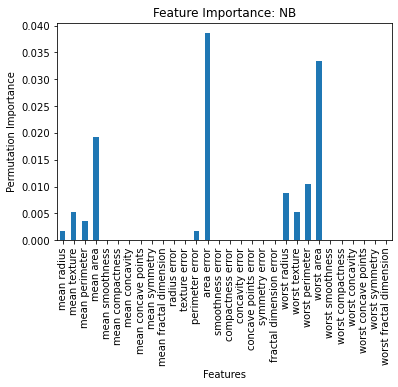

In [88]:
#NB Importances

from sklearn.inspection import permutation_importance
#https://stackoverflow.com/questions/62933365/how-to-get-the-feature-importance-in-gaussian-naive-bayes
#https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance

np.random.seed(5)
imps = permutation_importance(nb,X_test, y_test)
imps_means = imps.importances_mean

imps_means = pd.DataFrame(imps_means)
#imps_means = imps_means[imps_means[0] != 0]
imps_means.index = X_train.columns
ax = imps_means.plot.bar()
plt.xlabel("Features")
plt.title("Feature Importance: NB")
plt.ylabel("Permutation Importance")

ax.get_legend().set_visible(False)
plt.show()

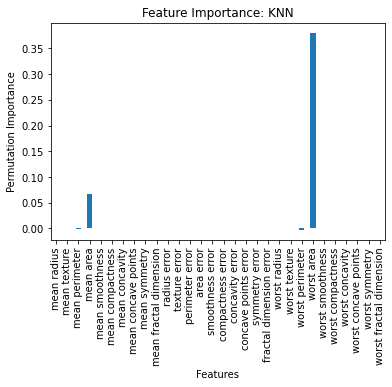

In [78]:
#KNN Importance
#https://machinelearningmastery.com/calculate-feature-importance-with-python/
# fit the model
np.random.seed(5)
# perform permutation importance
results = permutation_importance(knn, X_test, y_test)
# get importance
importance = results.importances_mean


importance = pd.DataFrame(importance, index = X_test.columns)

ax = importance.plot.bar()
plt.title("Feature Importance: KNN")
plt.xlabel("Features")
plt.ylabel("Permutation Importance")

ax.get_legend().set_visible(False)

fig.tight_layout()


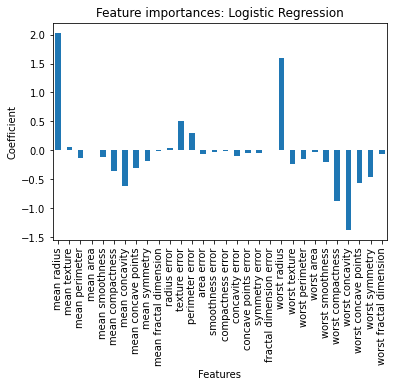

In [79]:
#Logistic Regression Importance
#https://machinelearningmastery.com/calculate-feature-importance-with-python/

# get importance
importance = lgr.coef_[0]
np.random.seed(5)

importance = pd.DataFrame(importance, index = X_train.columns)

ax = importance.plot.bar()
plt.xlabel("Features")
plt.title("Feature importances: Logistic Regression")
plt.ylabel("Coefficient")

ax.get_legend().set_visible(False)
fig.tight_layout()

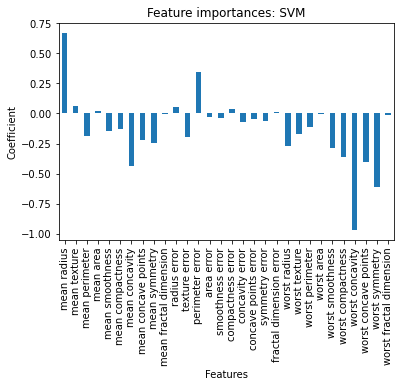

In [80]:
#SVM Importance
np.random.seed(5)
importance = pd.DataFrame(linear_svm.coef_[0], index = X_train.columns)

#https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn
ax = importance.plot.bar()
plt.title("Feature importances: SVM")
plt.xlabel("Features")
plt.ylabel("Coefficient")

ax.get_legend().set_visible(False)
fig.tight_layout()

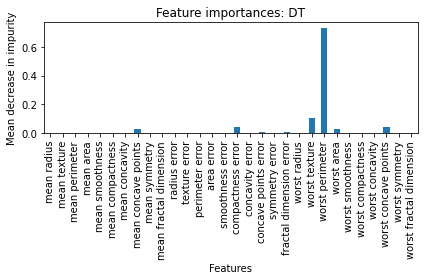

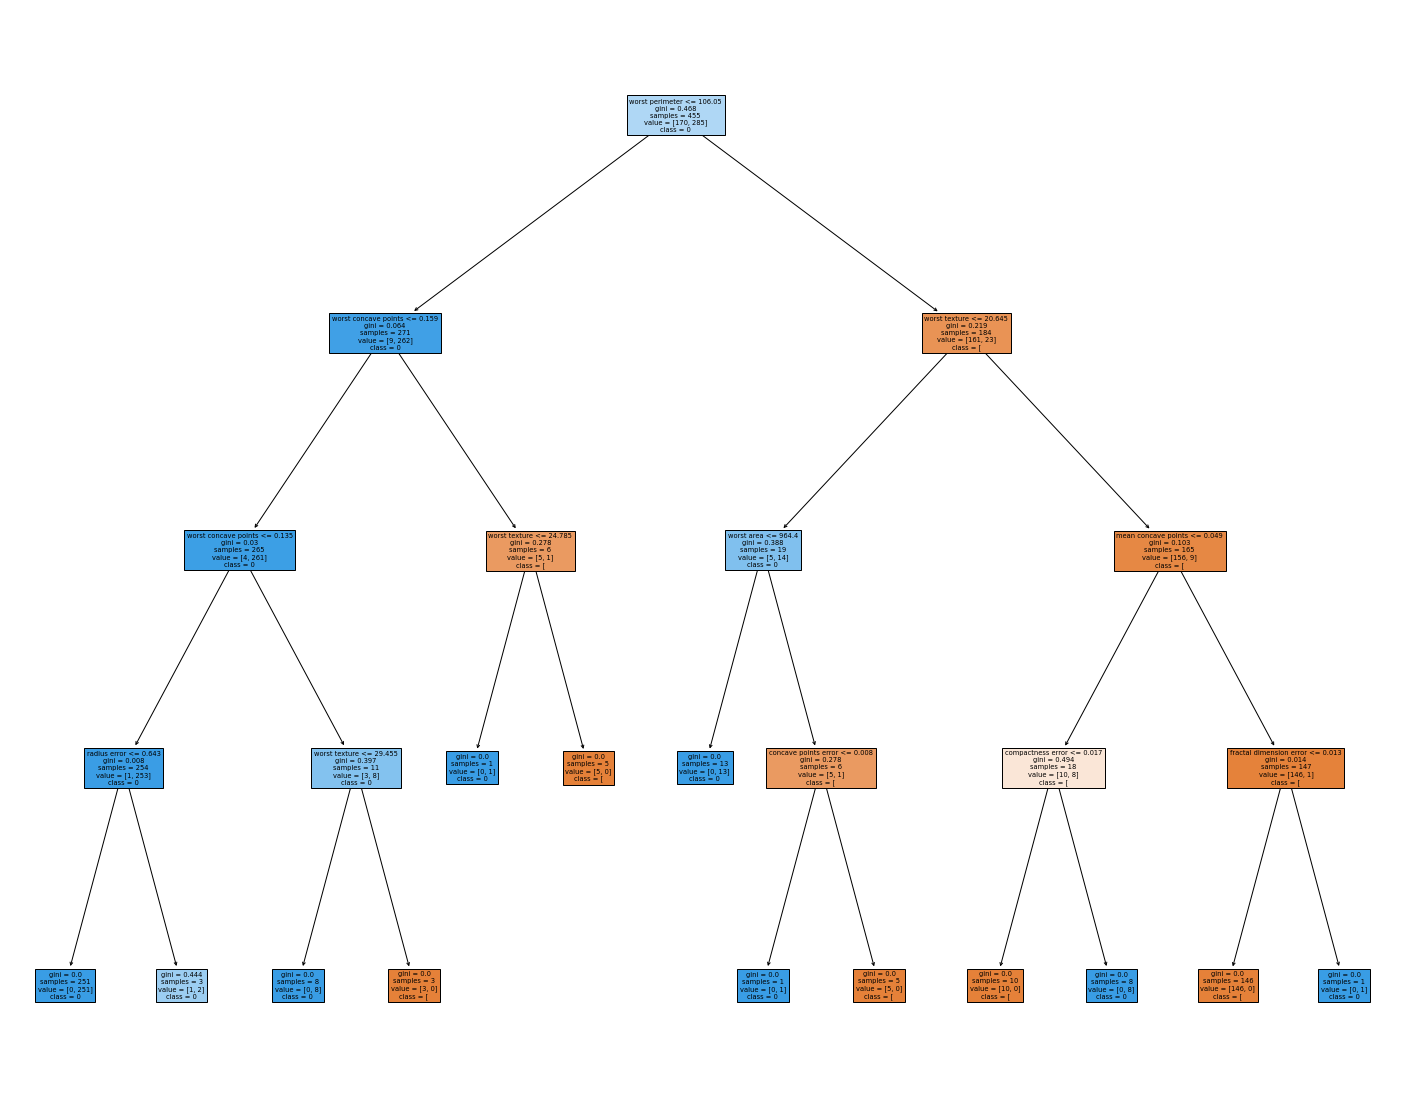

In [81]:
#DT Importance
from sklearn import tree
importances = dt.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
plt.title("Feature importances: DT")
plt.xlabel("Features")
plt.ylabel("Mean decrease in impurity")
fig.tight_layout()

classes = y.unique()
classes = str(classes)


#print decision tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=X_train.columns,  
                   class_names=classes,
                   filled=True)


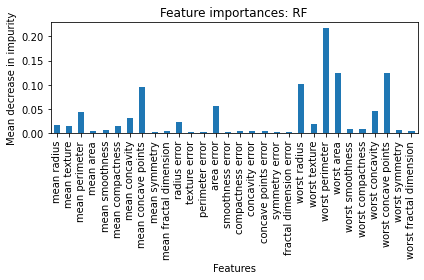

In [82]:
#RF Importances

importances = rf_c.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
plt.title("Feature importances: RF")
plt.ylabel("Mean decrease in impurity")
plt.xlabel("Features")
fig.tight_layout()

2B. Of all of the models in 1e, which was the most explainable? Why?


The Decision Tree model is the most explainable, as it has the most disproportionate ratio of importance among its features, with Worst Perimeter leading to a far greater decrease in impurity than any other attribute. It is thus much easier to understand how the model comes to its decision, It is also easy to visualize and understand exactly how the tree comes to its conclusions. This contrasts with models such as Random Forest, Logistic Regression, or SVM which use a more diverse set of variables to make their predictions.


2C. How might this information be useful in communicating to doctors performing screenings for cancer based on these images?

These doctors could learn from the Decision Tree model and study how the Worst Perimeter metric predicts breast cancer, knowing that it has a high level of predictive power in this specific model. This would be harder to do with other, less explainable models such as Random Forest or SVM, which have many more important features that they use to make their predictions and would be more difficult for a human to follow or replicate.

3. Varying the Decision Threshold (10%)
3A. For one of the models above that predicts the probabilities to perform the classification (i.e. Naive Bayes, Logistic Regression, Decision Trees, Random Forests), please construct/plot the Receiver Operating Characteristic (ROC) curve to show how well the model performs with across various choices of thresholds.

Random Forest Accuracy: 0.9473684210526315
Recall: 0.9736842105263158
[[37  5]
 [ 1 71]]


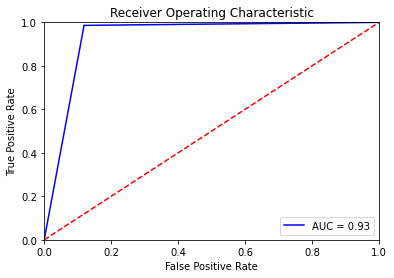

In [83]:
#Get ROC values for Random Forest
#https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
import sklearn.metrics as metrics
import scikitplot as skplt
rf_c = RandomForestClassifier(n_estimators = 50, min_samples_split = 5, max_depth = 20)
rf_c.fit(X_train, y_train)
pred = model.predict(X_test)
print(name + ' Accuracy: {}'.format(np.sum(pred==y_test)/len(y_test)) )
mat = confusion_matrix(y_test, pred)
recall = mat[0,0] / (mat[0,0] + mat[1,0])
print("Recall: " + str(recall))
print(mat)
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


3B. What is the area under this ROC curve? What does this tell us about our model?

The area is 0.93. This is a very high value and means that this model is very capable of differentiating between benign and malignant tumours. 

Extra Credit: What is the optimal choice of threshold for this model to optimize your “goodness” measure in part 1d? How did you find this?

I am interested in maximizing recall more than I am interested in maximizing accuracy. This is because I would rather a patient be misdiagnosed with cancer, than be misdiagnosed to be cancer free. A false cancer diagnosis would certainly be incredibly distressing for a patient, but would likely be resolved shortly after more testing. On the other hand, if the patient actually does have cancer but this is missed by the test, then they might not seek a second opinion and would then not receive treatment, which would be a truly catastrophic outcome.

In the interest of maximizing the True Positive rate, I would therefore set the threshold at the point at which it is maximized and close to 100%, i.e. the point at which the Y value is highest on this graph. This would lead to some False Positives, but I feel that is a tradeoff worth making in this context. 





